In [1]:
import pandas as pd
from ts_utils import *

In [2]:
# online data load
# data_location = "https://raw.githubusercontent.com/ourownstory/neuralprophet-data/main/datasets/"
# data = pd.read_csv(data_location + "energy/SF_hospital_load.csv")
# data.head(3)

In [3]:
# local data load
data = pd.read_csv("data/SF_hospital_load.csv")
data.head(3)

,ds,y
0,2015-01-01 01:00:00,778.007969
1,2015-01-01 02:00:00,776.241750
2,2015-01-01 03:00:00,779.357338


### Preparation

In [4]:
data = data.rename(columns={'ds':'datetime', 'y':'value'})
data['datetime'] = pd.to_datetime(data['datetime'])
data.set_index('datetime', inplace=True)

In [5]:
data_id = data.copy()
data_id['unique_id'] = np.nan
data_id = data_id.reset_index().rename(columns={'datetime': 'ds', 'value':'y'})

In [6]:
freq = get_frequency(data)
print(freq)

H


In [7]:
seasonal = is_seasonal(data)
print(seasonal)

True


In [8]:
period = get_seasonal_period(data)
print(period)

24


In [9]:
from statsforecast.models import (
    Theta,
    AutoARIMA,
    SeasonalNaive
)

C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\statsforecast\core.py:21: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [10]:
train_data = data.iloc[:-24]
test_data = data.iloc[-24:]

train_data_id = data_id.iloc[:-24]
test_data_id = data_id.iloc[-24:]

In [11]:
prediction_horizon = 24

### Theta    
https://nixtla.github.io/statsforecast/src/core/models.html#theta

In [12]:
model = Theta(season_length=period)
model = model.fit(y=train_data_id.y.to_numpy())
y_hat_dict = model.predict(h=prediction_horizon)

In [13]:
y_hat_dict

{'mean': array([ 809.83066086,  810.36499297,  810.60793958,  852.78861166,
         873.96621681,  986.1329185 , 1105.34442314, 1158.75452844,
        1192.45516261, 1204.85304283, 1203.7041366 , 1179.03585699,
        1178.16944092, 1184.11190968, 1177.22260093, 1176.92538087,
        1172.03341011, 1052.31186647,  995.68519336,  927.42799164,
         875.20664619,  835.58725775,  820.93546457,  813.83168618])}

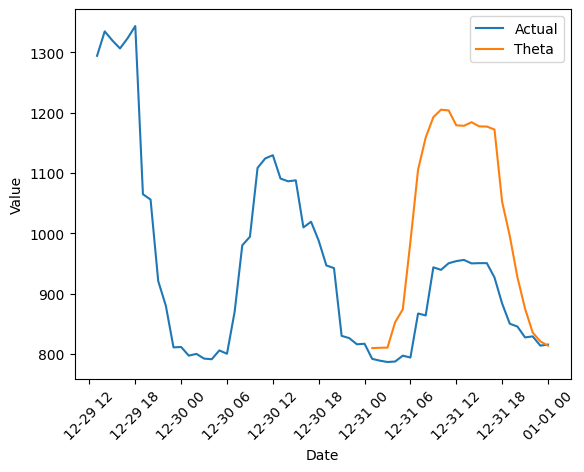

In [14]:
# Plot the actual values and the forecasted values
plt.plot(data.iloc[-60:].index, data['value'].iloc[-60:], label='Actual')
plt.plot(test_data.index, y_hat_dict['mean'], label='Theta')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Value')
plt.legend()
plt.show()

In [15]:
calculate_smape(test_data, y_hat_dict['mean'])

18.85403393880502

### Seasoal Naive (Baseline)

In [16]:
model = SeasonalNaive(season_length=period)
model = model.fit(y=train_data_id.y.to_numpy())
y_hat_dict_naive = model.predict(h=prediction_horizon)

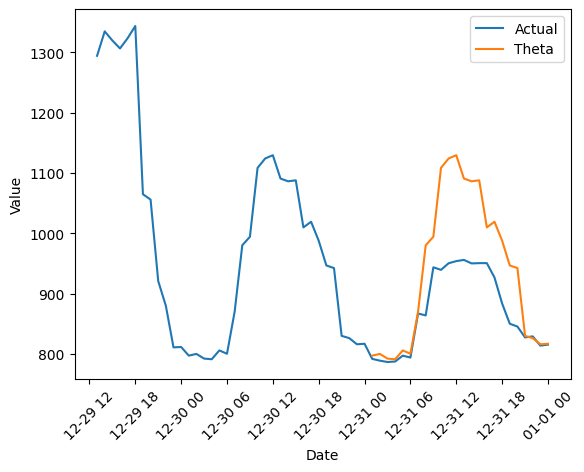

In [17]:
# Plot the actual values and the forecasted values
plt.plot(data.iloc[-60:].index, data['value'].iloc[-60:], label='Actual')
plt.plot(test_data.index, y_hat_dict_naive['mean'], label='Theta')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Value')
plt.legend()
plt.show()

### ARIMA

In [18]:
model = AutoARIMA(season_length=period)
model = model.fit(y=train_data_id.y.to_numpy())
y_hat_dict_arima = model.predict(h=prediction_horizon)

In [19]:
y_hat_dict_arima

{'mean': array([ 816.56680993,  820.09217258,  812.79597774,  805.70249822,
         840.19692207,  833.369469  ,  947.97830429, 1058.68726481,
        1077.97109867, 1170.21685244, 1187.87426378, 1190.98218228,
        1150.49864549, 1158.57837203, 1158.62983318, 1103.21806143,
        1114.05739732, 1097.15501569,  987.25454398,  982.09430184,
         860.40536922,  843.35366725,  817.39790124,  816.71769671])}

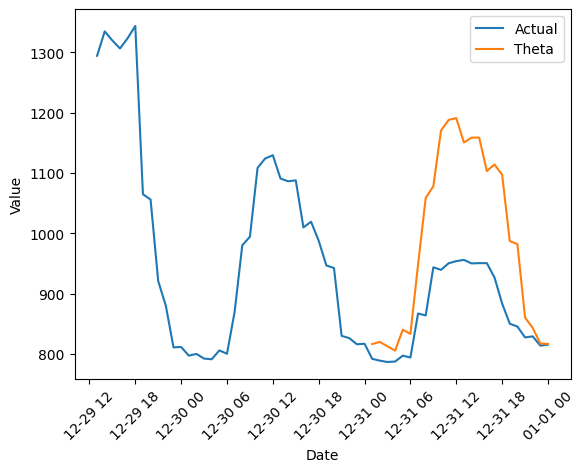

In [20]:
# Plot the actual values and the forecasted values
plt.plot(data.iloc[-60:].index, data['value'].iloc[-60:], label='Actual')
plt.plot(test_data.index, y_hat_dict_arima['mean'], label='Theta')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Value')
plt.legend()
plt.show()